<div dir="rtl" lang="he" xml:lang="he">

# פונקציית עלות _loos functoin_
פונקציית העלות, או בשם היותר נפוץ שלה (והמוזר קצת) _פונקציית ההפסד_ . 
מאפשרת לנו להעריך את כמה התחזית שנותן לנו המודל נכון. 
נראה כמה פונקציית עלות מפורסמות. 
 

<div dir="rtl" lang="he" xml:lang="he">

## חישוב פונקציית ההפסד
כאשר מביאים לפונקציית ההפסד שני קבוצות טנזורים, היא מחשבת את העלות שלהם (את המרחק בניהם) בשתי שלבים. 

- שלב ראשון: 
חישוב המרחק של כל וקטור בנפרד, הפוקציה מחשבת את המרחק של כל וקטור מהשני. 
- שלב שני: רידוקציה. הפונקציה מתאימה את המרחק לגודל הקבוצה. התהליך הזה נקרא reduction 
וניתן לשנות אותו בכל פונקציה.

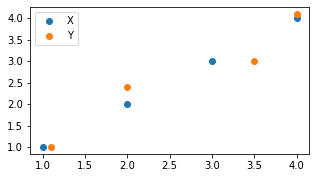

In [72]:
from torch import tensor, nn, randn
import torch
import matplotlib.pyplot as plt

x =tensor( [
    [1,1],
     [2,2],
     [3,3],
     [4,4]
])
y =tensor( [
    [1.1,1],
     [2,2.4],
     [3.5,3],
     [4,4.1]
])
def plot_diff(diff=None):
  fig, ax = plt.subplots(figsize=(5, 2.7))
  ax.scatter(*x.T, label='X')  
  ax.scatter(*y.T, label='Y')  
  if diff is not None:
    ax.scatter(*diff.T, label='diif')  
    
  ax.legend()
plot_diff()


<div dir="rtl" lang="he" xml:lang="he">

# עלות בL1
פונקציית המרחק בL1 
היא הפשוטה ביותר. 
היא מחזירה את ממוצע הערך המוחלט של סכום המרחקים
$$
\text{L1loss}(x,y)=\frac{\sum |x_i-y_i|}{n}
$$

In [34]:
loss = nn.L1Loss()
print(loss(x,y)) 
print(f"{x-y=}, \n{(x-y).mean()=}, \n{abs((x-y).mean())=}")

tensor(0.1375)
x-y=tensor([[-0.1000,  0.0000],
        [ 0.0000, -0.4000],
        [-0.5000,  0.0000],
        [ 0.0000, -0.1000]]), 
(x-y).mean()=tensor(-0.1375), 
abs((x-y).mean())=tensor(0.1375)


In [36]:
loss = nn.L1Loss(reduction="sum")
print(loss(x,y)) 
print(f"{x-y=}, \n{(x-y).sum()=}, \n{abs((x-y).sum())=}")

tensor(1.1000)
x-y=tensor([[-0.1000,  0.0000],
        [ 0.0000, -0.4000],
        [-0.5000,  0.0000],
        [ 0.0000, -0.1000]]), 
(x-y).sum()=tensor(-1.1000), 
abs((x-y).sum())=tensor(1.1000)


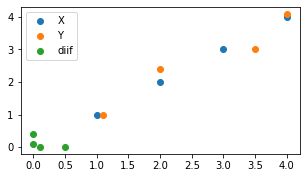

In [73]:
loss = nn.L1Loss(reduction="none")
plot_diff(loss(x,y))

<div dir="rtl" lang="he" xml:lang="he">

<div dir="rtl" lang="he" xml:lang="he">

# עלות בL2
מחשב את ריבוע המרחק
$$
\text{MSELoss}(x,y)=\frac{\sum (x_i-y_i)^2}{n}
$$

In [41]:
loss = nn.MSELoss()
print(loss(x,y)) 
print(f"{x-y=}, \n{(x-y)**2=}, \n{((x-y)**2).mean()=}")

tensor(0.0538)
x-y=tensor([[-0.1000,  0.0000],
        [ 0.0000, -0.4000],
        [-0.5000,  0.0000],
        [ 0.0000, -0.1000]]), 
(x-y)**2=tensor([[0.0100, 0.0000],
        [0.0000, 0.1600],
        [0.2500, 0.0000],
        [0.0000, 0.0100]]), 
((x-y)**2).mean()=tensor(0.0538)


In [43]:
loss = nn.MSELoss(reduction="sum")
print(loss(x,y)) 
print(f"{x-y=}, \n{(x-y)**2=}, \n{((x-y)**2).sum()=}, \n{((x-y)**2).sum()/(len(x)*2)=}")

tensor(0.4300)
x-y=tensor([[-0.1000,  0.0000],
        [ 0.0000, -0.4000],
        [-0.5000,  0.0000],
        [ 0.0000, -0.1000]]), 
(x-y)**2=tensor([[0.0100, 0.0000],
        [0.0000, 0.1600],
        [0.2500, 0.0000],
        [0.0000, 0.0100]]), 
((x-y)**2).sum()=tensor(0.4300), 
((x-y)**2).sum()/(len(x)*2)=tensor(0.0538)


<div dir="rtl" lang="he" xml:lang="he">


#אנתרופיה צולבת


אנתרופיה צולבת היא הדרך לחשב את ?
הנוסחה לאנתרופיה צולבת היא 
כאשר $q,p$ 
משתנים מקריים הנתמכים על 
$X$
אזי 
$$
H(p,q)=-\sum_{x\in X}p(x)\log q(x)
$$

In [48]:
# Example of target with class indices
loss = nn.CrossEntropyLoss()
print(loss(x.float(),y.float())) 

tensor(3.4657)


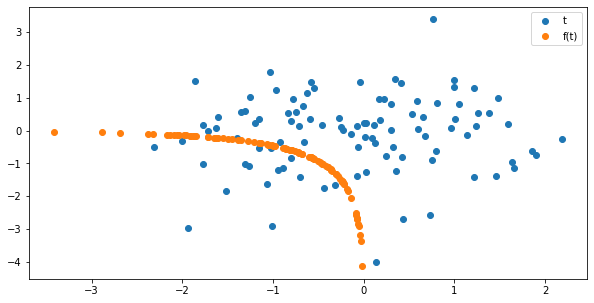

In [67]:
f = nn.LogSoftmax(dim=0)
t = torch.randn(2, 100)
# print(f"{t=},\n{f(t)=}")
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(*t,label="t")
ax.scatter(*f(t),label="f(t)")
ax.legend()